In [14]:
import numpy as np
import pandas as pd
import numpy.typing as npt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm
import config
from battery_data import test, train, log_transformer

In [29]:
N_SAMPLES = 200

polynomial_transformer = PolynomialFeatures(degree=config.POLYNOMIAL_DEGREE, include_bias=True)
x = train.logged['capacity'].to_numpy()
X = polynomial_transformer.fit_transform(x.reshape((-1, 1)))
y = train.logged['RUL'].to_numpy()
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

x_linspace = np.linspace(np.min(x), np.max(x), N_SAMPLES)
x_axis = polynomial_transformer.fit_transform(x_linspace.reshape((-1, 1)))

array([6.3077774 , 6.30786896, 6.30795288, ..., 0.75551987, 0.62923431,
       0.49714661])

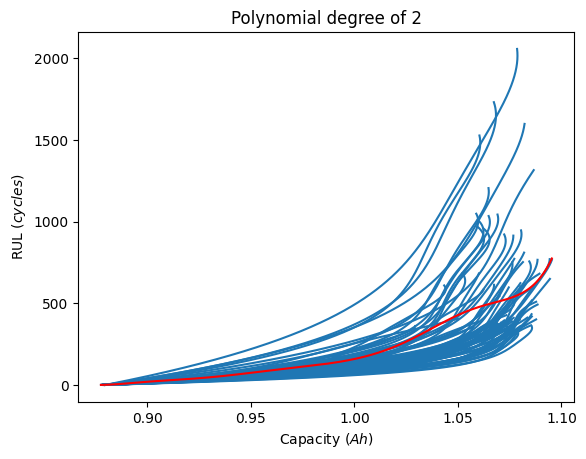

In [37]:
%matplotlib inline

fig, ax = plt.subplots()
train.transformed.groupby('battery_index').plot(x='capacity', y='RUL', ax=ax, color=config.TRUE_PLOT_COLOR, legend=False, zorder=0)
ax.plot(x_linspace, log_transformer.inverse_transform(model.predict(x_axis)), color=config.PREDICTED_PLOT_COLOR)

polynomial_degree = 2
ax.set_title(f'Polynomial degree of {polynomial_degree}')
ax.set_xlabel('Capacity ($Ah$)')
ax.set_ylabel('RUL ($cycles$)')